## PCA Transformation
- PCA is a method that reduces the dimensions of the feature space in such a way that new variables are orthogonal to each other (i.e. they are independent or not correlated). 
- These principal components are calculated only from features and no information from classes are considered. 
- So PCA is unsupervised method and it’s difficult to interpret the two axes as they are some complex mixture of the original features.

In [1]:
# Import the required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

# Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

In [2]:
# Importing the cancer dataset. load_breast_cancer will give both labels and the data.
# To fetch the data, call .data and for fetching the labels call .target

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [3]:
# Shape of data

cancer.data.shape

(569, 30)

In [4]:
# Shape of target

cancer.target.shape

(569,)

In [5]:
# Print details of the dataset

print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [6]:
# Number of instances of Benign (Target Class 1)

benign=cancer.data[cancer.target==1]
print(len(benign))

357


In [7]:
# Number of instances of Malignant (target Class 0)

malignant=cancer.data[cancer.target==0]
print(len(malignant))

212


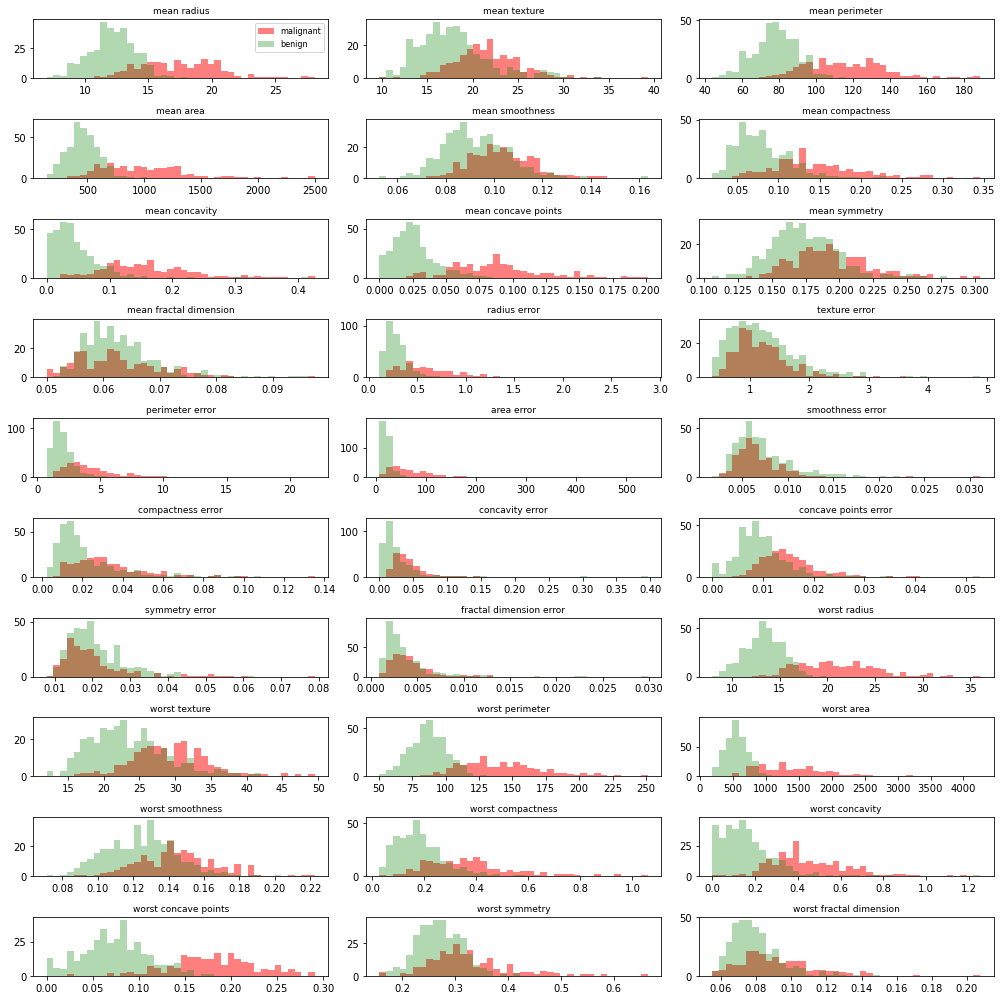

In [8]:
# Plot histogram of malignant and benign class for all 30 features

# 3 columns each containing 10 figures, total 30 features
fig,axes =plt.subplots(10,3, figsize=(14, 14))
ax=axes.ravel()

for i in range(30):
  _,bins=np.histogram(cancer.data[:,i],bins=40)
  ax[i].hist(malignant[:,i],bins=bins,color='r',alpha=.5)# red color for malignant class
  ax[i].hist(benign[:,i],bins=bins,color='g',alpha=0.3)# alpha is for transparency in the overlapped region 
  ax[i].set_title(cancer.feature_names[i],fontsize=9)
    
ax[0].legend(['malignant','benign'],loc='best',fontsize=8)
plt.tight_layout()

In [9]:
# Reshaping the cancer.target to concatenate it with the cancer.data 
# to create a DataFrame which will have both the data and labels.

labels = np.reshape(cancer.target,(569,1))
final_cancer_data = np.concatenate([cancer.data,labels],axis=1)
final_cancer_data.shape

(569, 31)

In [10]:
# Create the dataframe

dataset = pd.DataFrame(final_cancer_data)
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [11]:
# Print the column names

features = cancer.feature_names
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [12]:
# Merge column names to the dataset

features_labels = np.append(features,'label')
dataset.columns = features_labels
dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


Before applying PCA, we have to scale the data such that each feature has unit variance. This is necessary because fitting algorithms highly depend on the scaling of the features. While applying StandardScaler, each feature of the data should be normally distributed such that it will scale the distribution to a mean of zero and a standard deviation of one.

In [13]:
# Standardize the dataset

data_stand = dataset.loc[:, features].values
data_stand = StandardScaler().fit_transform(data_stand)

data_stand

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [14]:
# View the whole normalized dataset by converting the numpy array into a pandas DataFrame 

feat_cols = ['feature'+str(i) for i in range(data_stand.shape[1])]
normalised_dataset = pd.DataFrame(data_stand, columns=feat_cols)
normalised_dataset.head()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [15]:
print("Original Shape:", normalised_dataset.shape)

Original Shape: (569, 30)


In [16]:
# PCA transformation

pca_cancer = PCA(n_components=2)
principal_components_cancer = pca_cancer.fit_transform(data_stand)

In [17]:
# View PCA dataframe

X_principal = pd.DataFrame(principal_components_cancer) 
X_principal.columns = ['P1', 'P2'] 
X_principal.head()

,P1,P2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072


In [18]:
print("Reduced shape:", X_principal.shape)

Reduced shape: (569, 2)


In [19]:
print("PCA components shape:", pca_cancer.components_.shape)

PCA components shape: (2, 30)


In [20]:
# Check the values of eigen vectors prodeced by principal components

print("PCA components: \n", pca_cancer.components_)

PCA components: 
 [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


In [21]:
# The amount of variance each principal component holds after projecting the data to a lower dimensional subspace

print('Explained variation per principal component: {}'.format(pca_cancer.explained_variance_ratio_))

Explained variation per principal component: [0.44272026 0.18971182]


### PCA Result:
- The principal component 1 holds 44.27% of the information.
- The principal component 2 holds only 18.97% of the information. 
- While projecting 30-dimensional data to a 2-dimensional data, approx 36.8% information was lost.
- Or with PCA we converted a 30 dimensions dataset into 2 dimensions and retaining ~63% of information of the original dataset.

### PCA Visualizations

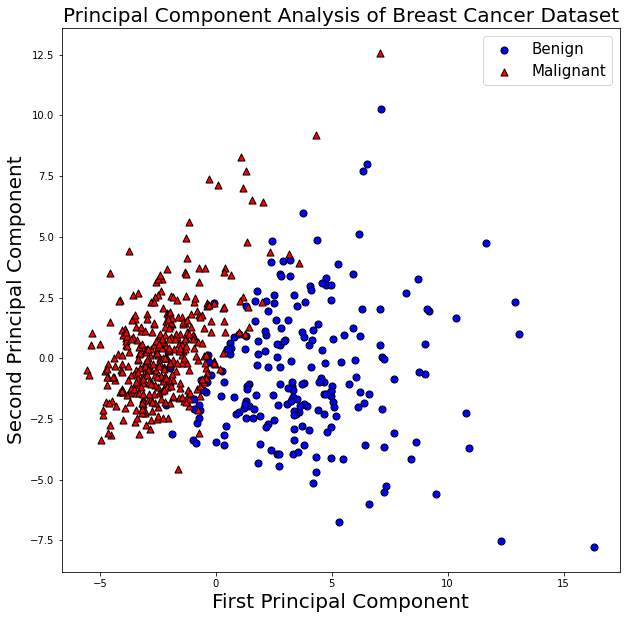

In [22]:
# 2D Visualization

plt.figure(figsize=(10,10))
plt.xlabel('First Principal Component',fontsize=20)
plt.ylabel('Second Principal Component',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = ['Benign', 'Malignant']
colors = ['b', 'r']
markers = ['o','^']

dataset['label'].replace(0, 'Benign',inplace=True)
dataset['label'].replace(1, 'Malignant',inplace=True)

for target, color, marker in zip(targets,colors,markers):
    indicesToKeep = dataset['label'] == target
    plt.scatter(X_principal.loc[indicesToKeep, 'P1'], X_principal.loc[indicesToKeep, 'P2'], 
                c = color, s = 50, marker=marker, edgecolors='black')

plt.legend(targets,prop={'size': 15})

Text(0.5, 0, 'Third Principal Component')

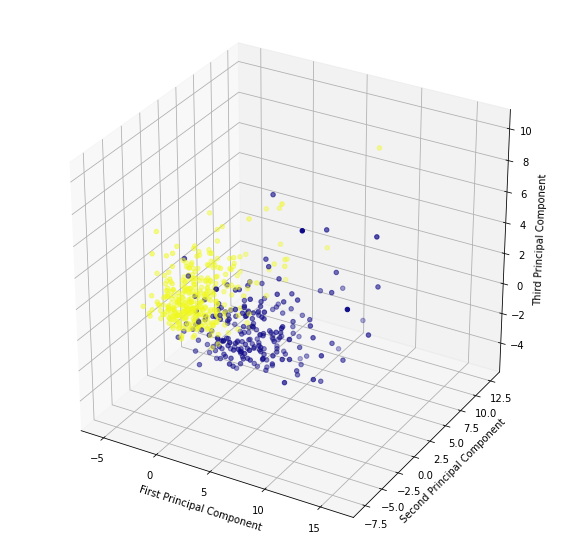

In [23]:
# 3D Visualization

df1=pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
scaling=StandardScaler()
scaling.fit(df1)
Scaled_data=scaling.transform(df1)
  
# Set the n_components=3
principal=PCA(n_components=3)
principal.fit(Scaled_data)
x_pca=principal.transform(Scaled_data)

# choose projection 3d for creating a 3d graph
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
axis = fig.add_subplot(111, projection='3d')
  
# x_pca[:,0] is pc1, x_pca[:,1] is pc2, x_pca[:,2] is pc3
axis.scatter(x_pca[:,0], x_pca[:,1], x_pca[:,2], c=cancer.target, cmap='plasma')
axis.set_xlabel('First Principal Component',fontsize=10)
axis.set_ylabel('Second Principal Component',fontsize=10)
axis.set_zlabel('Third Principal Component',fontsize=10)

Text(0.5, 0, 'Third Principal Component')

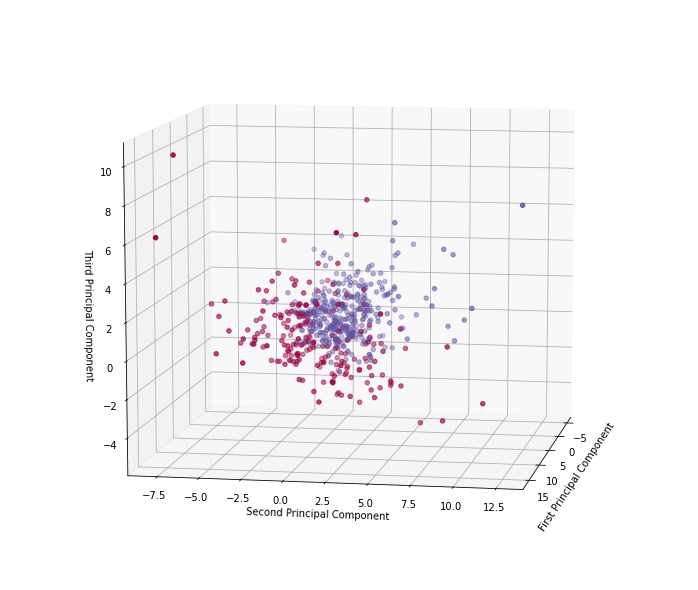

In [24]:
fig = plt.figure(figsize=(10, 8))
cmap = plt.cm.get_cmap("Spectral")
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=10, azim=10)
ax.scatter(x_pca[:,0], x_pca[:,1], x_pca[:,2], c=cancer.target, cmap=cmap)
ax.set_xlabel('First Principal Component',fontsize=10)
ax.set_ylabel('Second Principal Component',fontsize=10)
ax.set_zlabel('Third Principal Component',fontsize=10)

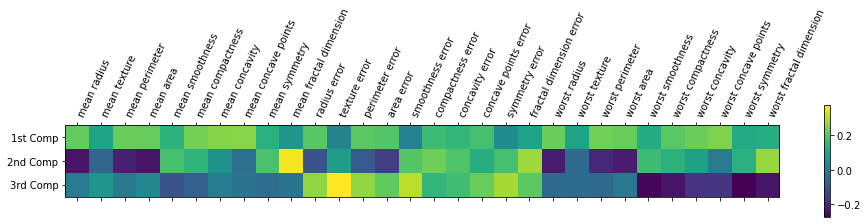

In [25]:
# Drawback of PCA is it’s almost impossible to tell how the initial features combined to form the principal components.
# Heat map to show how the features mixed up to create the components.

plt.matshow(principal.components_, cmap='viridis')
plt.yticks([0,1,2],['1st Comp','2nd Comp','3rd Comp'], fontsize=10)
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=65, ha='left')
plt.tight_layout()
plt.show()# 

In [26]:
# Check if n_components= 2 or 3 gives good result?

ex_variance=np.var(x_pca,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
print(ex_variance_ratio)

[0.60950217 0.2611802  0.12931763]


The first 2 components contributes to 87% of the total variance. So it’s good enough to choose only 2 components.